# Dimensionality Reduction

In [44]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## PCA

In [45]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


### Principle Components

In [46]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

C1 = Vt.T[:, 0]
C2 = Vt.T[:, 1]

print(C1)
print(C2)


[0.93636116 0.29854881 0.18465208]
[-0.34027485  0.90119108  0.2684542 ]


In [47]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [48]:
W2 = Vt.T[:, :2]
# Project the original X_centered to 2D dimention
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

print(X2D[:3, :])

[[-1.26203346 -0.42067648]
 [ 0.08001485  0.35272239]
 [-1.17545763 -0.36085729]]


### Using Scikit-Learn

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
print(X2D[:3, :])

[[ 1.26203346  0.42067648]
 [-0.08001485 -0.35272239]
 [ 1.17545763  0.36085729]]


In [50]:
ret = np.allclose(X2D[:3, :], -X2D_using_svd[:3, :])
print(ret)

True


In [51]:
X3D_inv = pca.inverse_transform(X2D)
ret = np.allclose(X3D_inv, X)
print(ret)

False


In [52]:
ret = np.mean(np.sum(np.square(X3D_inv - X), axis=1))
print(ret)

0.01017033779284855


In [53]:
print(pca.components_)
print(Vt[:2])

[[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]]
[[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]]


## Explained Variance Ratio

In [55]:
ret = pca.explained_variance_ratio_
print(ret)

[0.84248607 0.14631839]


In [56]:
loss = 1 - pca.explained_variance_ratio_.sum()
print(f"The loss of variance: {loss}")

The loss of variance: 0.011195535570688975


### Choose the Right Number of Dimensions

In [57]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=True)

### PCA for Compression

In [69]:
X = mnist["data"]

y = mnist["target"]
print(type(X))
print(X.head(n=5))
print(type(y))
print(y.head(n=5))


<class 'pandas.core.frame.DataFrame'>
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  p

In [70]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test  = train_test_split(X, y)

In [71]:
pca = PCA()
pca.fit(X_train)

PCA()

In [73]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)


153


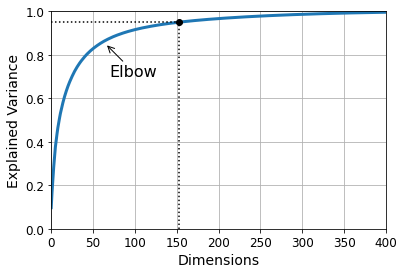

In [81]:
plt.figure(figsize=(6, 4))

plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(
    "Elbow",
    xy=(65, 0.85),
    xytext=(70, 0.7),
    arrowprops=dict(arrowstyle="->"),
    fontsize=16,
)
plt.grid()

plt.show()


In [82]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [84]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate(
        [instances, np.zeros((n_empty, size * size))], axis=0
    )

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(
        n_rows * size, images_per_row * size
    )
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")


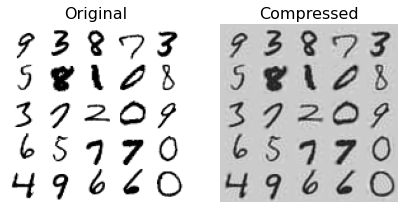

In [86]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

plt.show()

In [87]:
X_reduced_pca = X_reduced

#### Randomized PCA

In [88]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

#### Incremental PCA

In [89]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
	print(".", end="")
	inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [91]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

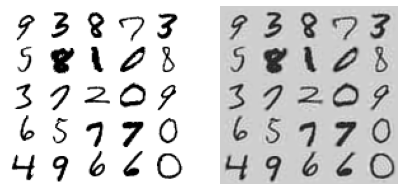

In [92]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.show()

In [94]:
X_reduced_inc_pca = X_reduced

ret = np.allclose(pca.mean_, inc_pca.mean_)
assert ret == True

ret = np.allclose(X_reduced_pca, X_reduced_inc_pca)
assert ret == False

#### Kernel PCA

In [100]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


In [101]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.4)
X_reduced = rbf_pca.fit_transform(X)

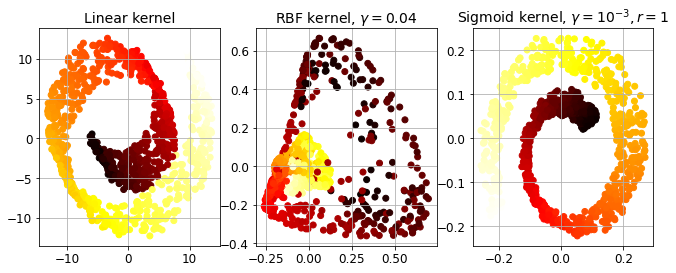

In [103]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True
)
sig_pca = KernelPCA(
    n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True
)

y = t > 6.9

plt.figure(figsize=(11, 4))

for subplot, pca, title in (
    (131, lin_pca, "Linear kernel"),
    (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
    (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$"),
):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.grid(True)

plt.show()


#### Selecting a Kernel and Tuning Hyperparameters

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

reg = Pipeline(
    [
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs")),
    ]
)

param_grid = [
    {"kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__kernel": ["rbf", "sigmoid"]}
]

grid_search = GridSearchCV(reg, param_grid, cv=3)
ret = grid_search.fit(X, y)

In [116]:
print(ret.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [117]:
rbf_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=0.043333333333333335, fit_inverse_transform=True
)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)


In [119]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.79523578725334

## LLE

In [5]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

NameError: name 'make_swiss_roll' is not defined

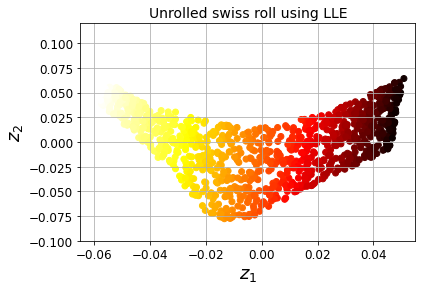

In [124]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel(r"$z_{1}$", fontsize=18)
plt.ylabel(r"$z_{2}$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

## Other Dimensionality Reduction Techniques

In [4]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

NameError: name 'X' is not defined

In [126]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)


In [127]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [1]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_mnist = mnist["data"]
# y_mnist = mnist["target"]
# lda.fit(X_mnist, y_mnist)
# X_reduced_lda = lda.transform(X_mnist)

In [3]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, titile, X_reduced in zip(
    (131, 132, 133), titles, (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)
):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel(r"$z_{1}$", fontsize=18)
    if subplot == 131:
        plt.ylabel(r"$z_{2}$", fontsize=18)
    plt.grid(True)

plt.show()

NameError: name 'plt' is not defined